In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials import mnist
import numpy as np
import pylab as plt

In [2]:
mnist_data = mnist.input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
tf.reset_default_graph()
with tf.gfile.FastGFile("./model/cnn-mnist.pb","rb") as file:
    pb_content = file.read()
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(pb_content)
    tf.import_graph_def(graph_def,name="model")

In [8]:
test_x= mnist_data.test.images
test_y = mnist_data.test.labels
total_count = len(test_x)
sample_indes = np.random.choice(total_count,10,False)
sample_test_x = test_x[sample_indes]
sample_test_y = test_y[sample_indes]

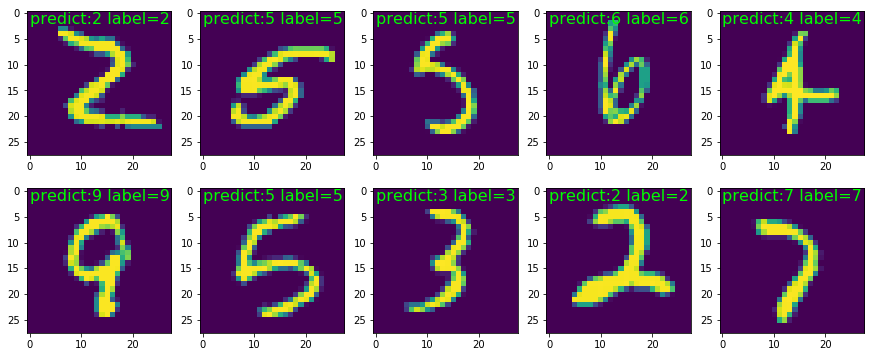

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #print([node.name for node in sess.graph.as_graph_def().node])
    prediction_tensor = sess.graph.get_tensor_by_name("model/prediction:0")
    prediction_y = sess.run(prediction_tensor,feed_dict={"model/Input/x:0":sample_test_x})
plt.figure(figsize=(15,6))
for index,prediction_value in enumerate(prediction_y):
    image_arr = np.reshape(sample_test_x[index],(28,28))
    ax = plt.subplot(2,5,index+1)
    ax.imshow(image_arr)
    pre_class = np.argmax(prediction_value)
    real_class = np.argmax(sample_test_y[index])
    color = "#00ff00" if pre_class == real_class else "red"
    ax.text(0,2,"predict:{} label={}".format(pre_class,real_class),color=color,fontsize=16)
plt.show()